<a href="https://colab.research.google.com/github/mgamzec/GeoPython/blob/main/geemap_timeseries_landsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

In [ ]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=jIwXPWxV2JiQ9SgV0G2xJwfZzPdchPEqk5pYYWizRvw&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWi69YyTqCHrGCNBW32leSGmwJ2UVTW6wDftGyD80Svj15XeMsMxIdU

Successfully saved authorization token.


In [ ]:
import ee
import geemap

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path='/content/drive/MyDrive/GEE_Python/Udemy_GEE_api course/op/country_op1'

In [ ]:
!pip install geextract

  Created wheel for geextract: filename=geextract-0.5.0-py3-none-any.whl size=12847 sha256=70112099aabc095b269de781c42b7a244dbfe68fe862879d7472fbd627046f5e
  Stored in directory: /root/.cache/pip/wheels/2e/1a/8e/d123e50525e5101db2cee6f4686c6e7637534f83d4e87f0e5e
Successfully built geextract


In [ ]:
from geextract import ts_extract, get_date
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [ ]:
#lat = 15.608
#lon = 99.3208
lat=15.608
lon=99.3208

#raw_dict = ts_extract(lon=lon, lat=lat, sensor='LT5',start=datetime(1985, 1, 1), radius=200)
raw_dict=ts_extract(lon=lon,lat=lat,sensor='LT5',start=datetime(1985,1,1),radius=300)

In [ ]:
# Function to compute ndvi from a dictionary of the list of dictionaries returned
# by ts_extract
def ndvi(x):
    try:
        return (x['B4'] - x['B3']) / (x['B4'] + x['B3'])
    except:
        pass

In [ ]:
# Build x and y arrays and remove missing values
#x = np.array([get_date(d['id']) for d in raw_dict])
#y = np.array([ndvi(d) for d in raw_dict], dtype=np.float)
#x = x[~np.isnan(y)]
#y = y[~np.isnan(y)]

x=np.array([get_date(d['id'])for d in raw_dict])
y=np.array([ndvi(d) for d in raw_dict], dtype=np.float)

x=x[~np.isnan(y)]
y=y[~np.isnan(y)]

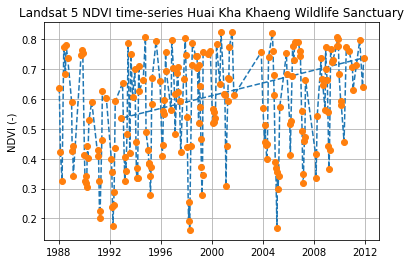

In [ ]:
# Make plot
#plt.plot_date(x, y, "--")
#plt.plot_date(x, y)
#plt.title("Landsat 5 NDVI time-series Huai Kha Khaeng Wildlife Sanctuary")
#plt.ylabel("NDVI (-)")
#plt.grid(True)
#plt.show()

plt.plot_date(x,y,"--")
plt.plot_date(x,y)
plt.title("Landsat 5 NDVI time-series Huai Kha Khaeng Wildlife Sanctuary")
plt.ylabel("NDVI (-)")
plt.grid(True)
plt.show()

In [ ]:
!pip install fiona

     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
from geextract import ts_extract, relabel, date_append, dictlist2sqlite
import fiona
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3
from datetime import datetime
import os


In [ ]:
try:
    os.remove('/tmp/landsat_cdmx.sqlite')
except:
    pass

In [ ]:
# Open feature collection generator
with fiona.open('/content/drive/MyDrive/GEE_Python/Udemy_GEE_api course/op/country_op1/country_IDN.gpkg', layer='country_IDN') as src:
    # Iterate over feature collection
    for feature in src:
        # Extract time-series
        ts_0 = ts_extract(sensor='LC8', start=datetime(2012, 1, 1),
                          feature=feature)
        ts_1 = relabel(ts_0, 'LC8')
        ts_2 = date_append(ts_1)
        # Write dictionnary list to sqlite database table
        dictlist2sqlite(ts_2, site=feature['properties']['name'],
                        sensor='LC8', db_src='/tmp/landsat_cdmx.sqlite',
                        table='cdmx')

EEException: ignored